# Fundamentals of Statistics Unit 1 Notes

In [4]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <u>Sample Mean</u>
- $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i = \frac{1}{n} S_n$
- $Var(\bar{X}_n) = \frac{\sum_{i=1}^n Var(X_i)}{n^2} = \frac{n \sigma^2}{n^2} = \frac{\sigma^2}{n}$
- $E[\bar{X}_n] = E[X_i] = \mu$

### Central Limit Theorem
    
 - for $n \geq 30$, $\bar{X}_n \approx \mathcal{N}(\mu, \sigma^2/n)$
    - and $\sqrt{n} \frac{\bar{X}_n - \mu}{\sigma} \approx \mathcal{N}(0, 1)$
 - $\lim_{n \rightarrow \infty} \bar{X}_n = \mu$

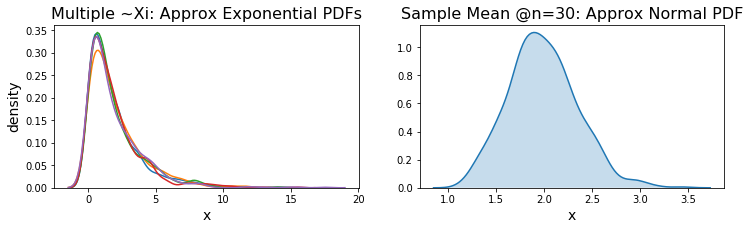

          X  Sample Mean
mean      2         1.99
variance  4         0.13


In [5]:
# Uses approximate distributions in arrays to stand for RVs
# Simulates the averaging of RV's; the sample mean is a new RV
n = 30
mean = 2
var = mean**2
X = np.array([np.random.exponential(mean, 700) for i in range(n)])
sample_mean = np.sum(X, axis=0) / n

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.title('Multiple ~Xi: Approx Exponential PDFs', fontsize=16)
plt.ylabel('density', fontsize=14)
plt.xlabel('x', fontsize=14)
for apprx_density_function in X[:5]:
    sns.kdeplot(apprx_density_function)

plt.subplot(1, 2, 2)
plt.title('Sample Mean @n=30: Approx Normal PDF', fontsize=16)
plt.xlabel('x', fontsize=14)
sns.kdeplot(sample_mean, shade=True)

plt.show()

table = pd.DataFrame({'X':[2, 4], 'Sample Mean':[round(np.mean(sample_mean), 2), round(np.var(sample_mean), 2)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

# <u>Deviation Probability Inequalities</u>

### Hoeffding's Inequality
for $n > 0$ i.i.d. RV's $X_1, X_2, ..., X_n \sim X$ almost surely bounded ($P(X \notin [a, b]) = 0$)
- $P(|\bar{X}_n - E[X]| \geq \epsilon) \leq 2 e^{-(2 n \epsilon^2) / (b - a)^2}$

### Markov Inequality
for a non-negative RV $X \geq 0$ with mean $\mu > 0$ and any number $t > 0$
- $P(X \geq t) \leq \frac{\mu}{t}$

### Chebyshev Inequality
NOTE: switching from $\bar{X}_n$ to $X$ changes variance from $\sigma^2/n$ to $\sigma^2$ and vice-versa

for an RV X with finite mean $\mu$ and variance $\sigma^2$ and any number $t \geq 0$

- $P(|X - \mu| \geq t) \leq \frac{\sigma^2}{t^2}$


# <u>Gaussian / Normal Distribution</u>
### $f_{N(\mu, \sigma^2)}(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

### Affine Transformation
- $X \sim \mathcal{N}(\mu, \sigma^2) \rightarrow a X + b \sim \mathcal{N}(a  \mu + b, a^2 \sigma^2)$

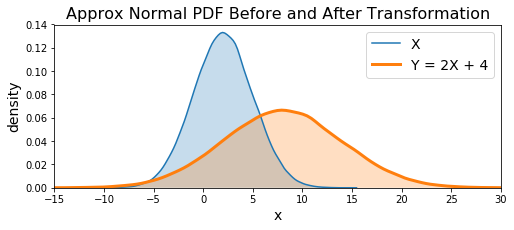

          X      Y
mean      2   8.01
variance  9  35.96


In [53]:
# Uses approximate distributions in arrays to stand for RVs
mean = 2
var = 9

X = np.random.normal(2, m.sqrt(var), 100000)
Y = 2 * X + 4

plt.figure(figsize=(8, 3))
plt.title('Approx Normal PDF Before and After Transformation', fontsize=16)
plt.ylabel('density', fontsize=14)
plt.xlabel('x', fontsize=14)
sns.kdeplot(X, shade=True, label='X')
sns.kdeplot(Y, shade=True, label='Y = 2X + 4', lw=3)
plt.xlim(-15, 30)
plt.legend(fontsize=14)

plt.show()

table = pd.DataFrame({'X':[mean, var], 'Y':[round(np.mean(Y), 2), round(np.var(Y), 2)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

### Standardization
- $X \sim \mathcal{N}(\mu, \sigma^2) \rightarrow Z = \frac{X - \mu}{\sigma} \sim \mathcal{N}(0, 1)$
- $P(u \leq X \leq v) = P(\frac{u - \mu}{\sigma} \leq Z \leq \frac{v - \mu}{\sigma})$


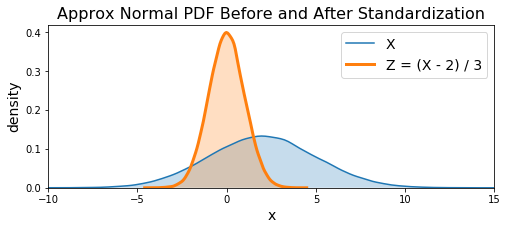

          X    Z
mean      2  0.0
variance  9  1.0


In [57]:
# Uses approximate distributions in arrays to stand for RVs
# Note that X is distributed the same as in the last plot - look at the density
Z = (X - mean) / m.sqrt(var)

plt.figure(figsize=(8, 3))
plt.title('Approx Normal PDF Before and After Standardization', fontsize=16)
plt.ylabel('density', fontsize=14)
plt.xlabel('x', fontsize=14)
sns.kdeplot(X, shade=True, label='X')
sns.kdeplot(Z, shade=True, label='Z = (X - 2) / 3', lw=3)
plt.xlim(-10, 15)
plt.legend(fontsize=14)

plt.show()

table = pd.DataFrame({'X':[mean, var], 'Z':[round(np.mean(Z), 2), round(np.var(Z), 2)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

### Symmetry
- $X \sim \mathcal{N}(0, \sigma^2) \rightarrow -X \sim \mathcal{N}(0, \sigma^2)$
- if $x > 0$, $P(|X| > x) = P(X > x) + P(X < -x) = 2 P(X > x)$

# <u>Quantiles</u>
NOTE: use keyword argument lower.tail=FALSE in R to have a quantile function follow this convention

Let $\alpha \in (0, 1)$. The quantile of order $1 - \alpha$ of RV $X$ is the number $q_\alpha$ such that $P(X \leq q_\alpha) = F_X(q_\alpha) = 1 - \alpha$.

- $F_X(q_\alpha) = 1 - \alpha$
- If $F_X$ is invertible, $F_X^{-1}(1 - \alpha) = q_\alpha$
- $P(X > q_\alpha) = 1 - F_X(q_\alpha) = \alpha$
- If $X = Z \sim \mathcal{N}(0,1) \rightarrow P(|X| > q_{\alpha/2}) = \alpha$


# <u>Law of Large Numbers / Convergence</u>

The average of results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

- $X_n$ is a sequence of random variables, $ n \geq 1$. $X$ is a random variable, or deterministic (non-random) value. $\bar{X}_n$ is the sample mean and $\mu$ is the mean of $X$.


### Strong Law of Large Numbers

The sample mean converges almost surely to the expected value. Or, $\bar{X}_n$ becomes $\mu$ as $n \to \infty$, barring events of zero probability.

- $\bar{X}_n \overset{a.s.}{\to} \mu$ as $n \rightarrow \infty$ 
- That is, $P(\lim_{n \to \infty} \bar{X}_n = \mu) = 1$



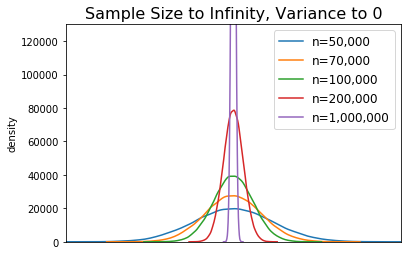

In [105]:
# Shows shrinking variance with realized samples, could have also used RV simulation as before
X = np.random.normal(0, 1, 1000000)
sample_sizes = [50000, 70000, 100000, 200000, 1000000]

plt.title('Sample Size to Infinity, Variance to 0', fontsize=16)
plt.ylabel('density')
for n in sample_sizes:
    sample = X[:n]
    sns.kdeplot(sample / n, label=f'n={n:,}')
plt.ylim(0, 130000)
plt.xlim(-.000085, 0.000085)
plt.tick_params(
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.yticks()
plt.legend(fontsize=12)

plt.show()

### Weak Law of Large Numbers

The sample mean converges to the expected value in probability. Or, $\bar{X}_n$ comes close to $\mu$ as $n \to \infty$.

- $\bar{X}_n \overset{p}{\to} \mu$ as $n \rightarrow \infty$ 
- That is, $\lim_{n \to \infty}P(|\bar{X}_n - \mu| > \epsilon) = 0$


### Convergence Almost Surely

When a sequence of R.V.s $X_n$ converges to an R.V. $X$ w.p. 1, such that all possible mappings from the probability space($\Omega$) to $\mathbb{R}$ are equivalent between $X_n$ and $X$.

- $X_n \overset{a.s.}{\to}_{n \rightarrow \infty} X$ iff $P(\{\omega : X_n(\omega) \rightarrow_{n \rightarrow \infty} X_n(\omega)\}) = 1$

### Convergence in Probability

When a sequence of R.V.s $X_n$ converges to an R.V. $X$ such that the difference between $X_n$ and $X$ is smaller than an arbitrarily small $\epsilon$ as $n \to \infty$. Difference is measurable in comparing how they map $\omega \in \Omega$ to $\mathbb{R}$.

- $X_n \overset{p}{\to}_{n \to \infty} X$ iff $P(|X_n - X| \geq \epsilon) \rightarrow_{n \to \infty} = 0$

$\forall \epsilon > 0$ 

### Convergence in Distribution

When a sequence of R.V.s converges to a distribution, as when the average of a set of R.V.s converges to a normal distribution, according to the central limit theorem.

- $X_n \overset{(d)}{\to}_{n \to \infty}$ iff $E[f(X_n)] \to_{n \to \infty} E[f(X)]$ 

for all continuous and bounded functions $f$.

Simulation of the averaging of exponential random variables.


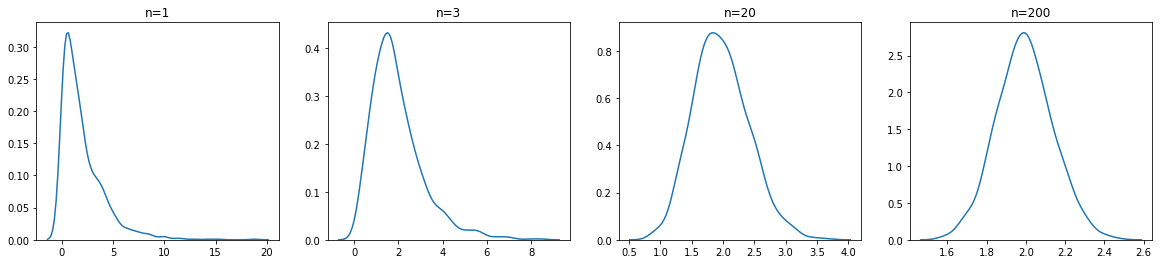

In [113]:
# Uses approximate distributions in arrays to stand for RVs
print('Simulation of the averaging of exponential random variables.')
X = np.array([np.random.exponential(2, 1000) for i in range(200)])
sample_sizes = [1, 3, 20, 200]

plt.figure(figsize=(20, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.title(f'n={sample_sizes[i]}')
    sns.kdeplot(np.sum(X[:sample_sizes[i]], axis=0) / sample_sizes[i])

### Slutsky's Theorem

- Let $X_n \overset{(d)}{\to}_{n \to \infty} X$, an RV and $Y_n \overset{p}{\to}_{n \to \infty} y$, a real number

- $X_n + Y_n \overset{(d)}{\to}_{n \to \infty} X + y$

- $X_n Y_n \overset{(d)}{\to}_{n \to \infty} Xy$

- if $ y \neq 0$, then $\frac{X_n}{Y_n} \overset{(d)}{\to}_{n \to \infty} \frac{X}{y}$

### Continuous Mapping Theorem

If $f$ is a continuous function,

- $X_n \overset{a.s./p/(d)}{\longrightarrow}_{n \to \infty} X \Rightarrow f(X_n) \longrightarrow_{n \to \infty} f(X)$